In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
from datetime import timedelta
import os

import inception

import prettytensor as pt

In [2]:
import cifar10

In [3]:
from cifar10 import num_classes

In [4]:
# Reuse existing data in 'Practical ML' (abandoned) repository
cifar10.data_path = "C:/Users/Aman Deep Singh/Documents/Python/Practical ML/data/CIFAR-10"

In [5]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [6]:
class_names = cifar10.load_class_names()
class_names

Loading data: C:/Users/Aman Deep Singh/Documents/Python/Practical ML/data/CIFAR-10\cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [7]:
images_train, cls_train, labels_train = cifar10.load_training_data()

Loading data: C:/Users/Aman Deep Singh/Documents/Python/Practical ML/data/CIFAR-10\cifar-10-batches-py/data_batch_1
Loading data: C:/Users/Aman Deep Singh/Documents/Python/Practical ML/data/CIFAR-10\cifar-10-batches-py/data_batch_2
Loading data: C:/Users/Aman Deep Singh/Documents/Python/Practical ML/data/CIFAR-10\cifar-10-batches-py/data_batch_3
Loading data: C:/Users/Aman Deep Singh/Documents/Python/Practical ML/data/CIFAR-10\cifar-10-batches-py/data_batch_4
Loading data: C:/Users/Aman Deep Singh/Documents/Python/Practical ML/data/CIFAR-10\cifar-10-batches-py/data_batch_5


In [8]:
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: C:/Users/Aman Deep Singh/Documents/Python/Practical ML/data/CIFAR-10\cifar-10-batches-py/test_batch


In [9]:
print('Size of:')
print(f'-Training-set:\t\t{len(images_train)}')
print(f'-Test-set:\t\t{len(images_test)}')

Size of:
-Training-set:		50000
-Test-set:		10000


In [10]:
def plot_images(images, cls_true, cls_pred=None, smooth=True):
    assert len(images) == len(cls_true)
    
    fig, axes = plt.subplots(3, 3)
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)
    
    if smooth:
        interpolation = 'spline16'
    else:
        interpolation = 'nearest'
        
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i], interpolation=interpolation)
            cls_true_name = class_names[cls_true[i]]
            if cls_pred is None:
                xlabel = f'True: {cls_true_name}'
            else:
                cls_pred_name = class_names[cls_pred[i]]
                xlabel = f'True: {cls_true_name}\nPred: {cls_pred_name}'
            ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

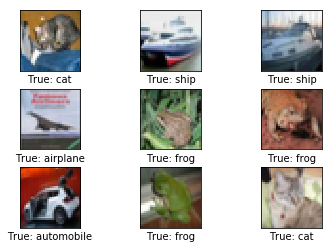

In [11]:
# Get the first images from the test-set.
images = images_test[0:9]

# Get the true classes for those images.
cls_true = cls_test[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true, smooth=False)

In [12]:
inception.data_dir = 'C:/Users/Aman Deep Singh/Documents/Python/Practical ML/inception/'

In [13]:
inception.maybe_download()

Data has apparently already been downloaded and unpacked.


In [14]:
model = inception.Inception()

In [15]:
from inception import transfer_values_cache

In [16]:
file_path_cache_train = os.path.join(cifar10.data_path, 'inception_cifar10_train.pkl')
file_path_cache_test = os.path.join(cifar10.data_path, 'inception_cifar10_test.pkl')

In [17]:
print("Processing Inception transfer-values for training-images ...")

# Scale images because Inception needs pixels to be between 0 and 255,
# while the CIFAR-10 functions return pixels between 0.0 and 1.0
images_scaled = images_train * 255.0

# If transfer-values have already been calculated then reload them,
# otherwise calculate them and save them to a cache-file.
transfer_values_train = transfer_values_cache(cache_path=file_path_cache_train,
                                              images=images_scaled,
                                              model=model)

Processing Inception transfer-values for training-images ...
- Data loaded from cache-file: C:/Users/Aman Deep Singh/Documents/Python/Practical ML/data/CIFAR-10\inception_cifar10_train.pkl


In [ ]:
print("Processing Inception transfer-values for test-images ...")

# Scale images because Inception needs pixels to be between 0 and 255,
# while the CIFAR-10 functions return pixels between 0.0 and 1.0
images_scaled = images_test * 255.0

# If transfer-values have already been calculated then reload them,
# otherwise calculate them and save them to a cache-file.
transfer_values_test = transfer_values_cache(cache_path=file_path_cache_test,
                                             images=images_scaled,
                                             model=model)

Processing Inception transfer-values for test-images ...
- Processing image:   9558 / 10000

In [ ]:
transfer_values_train.shape

In [ ]:
transfer_values_test.shape

In [ ]:
def plot_transfer_values(i):
    # Plot the i'th image from the test-set
    print('Input image:')
    plt.imshow(images_test[i], interpolation='nearest')
    plt.show()
    
    # Transform the transfer-values into an image
    print('Transfer values for the image using Inception model')
    img = transfer_values_test[i]
    img = img.reshape((32, 64))
    
    # Plot the image for the transfer-values
    plt.imshow(img, interpolation='nearest', cmap='Reds')
    plt.show()

In [ ]:
plot_transfer_values(16)

In [ ]:
plot_transfer_values(17)

In [ ]:
# Analysis of transfer values using PCA
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
transfer_values = transfer_values_train[0:3000]

In [ ]:
cls = cls_train[0:3000]

In [ ]:
transfer_values.shape

In [ ]:
transfer_values_reduced = pca.fit_transform(transfer_values)

In [ ]:
transfer_values_reduced.shape

In [ ]:
def plot_scatter(values, cls):
    import matplotlib.cm as cm
    cmap = cm.rainbow(np.linspace(0.0, 1.0, num_classes))
    
    colors = cmap[cls]
    
    x = values[:, 0]
    y = values[:, 1]
    
    plt.scatter(x, y, color=colors)
    plt.show()

In [ ]:
plot_scatter(transfer_values_reduced, cls)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
# t-SNE is another method for doing dimensionality reduction. 
# Unfortunately, t-SNE is very slow so we first use PCA to reduce
# the transfer values from 2048 to 50 elements
pca = PCA(n_components=50)
transfer_values_50d = pca.fit_transform(transfer_values)

In [ ]:
tsne = TSNE(n_components=2)
# The current implementation of t-SNE in scikit-learn cannot 
# handle data with many samples so this might crash if we use
# the full training set
transfer_values_reduced = tsne.fit_transform(transfer_values_50d)
transfer_values_reduced.shape

In [ ]:
plot_scatter(transfer_values_reduced, cls)

In [ ]:
# New classifier in TensorFlow
transfer_len = model.transfer_len
# The shape of the input variable for the new neural network will be [None, transfer_len]

In [ ]:
x = tf.placeholder(tf.float32, shape=[None, transfer_len], name='x')

In [ ]:
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')

In [ ]:
y_true_cls = tf.argmax(y_true, dimension=1)

In [ ]:
x_pretty = pt.wrap(x)

with pt.defaults_scope(activation_fn=tf.nn.relu):
    y_pred, loss = x_pretty.fully_connected(size=1024, name='layer_fc1').softmax_classifier(num_classes=num_classes, labels=y_true)

In [ ]:
# Optimization method
global_step = tf.Variable(initial_value=0, name='global_step', trainable=False)

In [ ]:
optimizer = tf.nn.train.AdamOptimizer(learning_rate=1e-4).minimize(loss, global_step)

In [ ]:
# Classification accuracy
y_pred_cls = tf.argmax(y_pred, dimension=1)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
# Tensorflow Run
session = tf.Session()

In [ ]:
session.run(tf.global_variables_initializer())

In [ ]:
training_batch_size = 64

In [ ]:
# function for selecting a random batch of transfer-values from the training set
def random_batch():
    num_images = len(transfer_values_train)
    idx = np.random.choice(num_images, size=train_batch_size, replace=False)
    # Use the random index to select random x and y values
    # We use the transfer values instead of images as x-values
    x_batch = transfer_values_train[idx]
    y_batch = labels_train[idx]
    
    return x_batch, y_batch

In [ ]:
# helper function to perform optimization
def optimize(num_iterations):
    start_time = time.time()
    
    for i in range(num_iterations):
        x_batch, y_true_batch = random_batch()
        feed_dict_train = {x: x_batch, y_true: y_true_batch}
        i_global, _ = session.run([global_step, optimizer], feed_dict=feed_dict_train)
        if (i_global % 100 == 0) or (i == num_iterations - 1):
            batch_acc = session.run(accuracy, feed_dict=feed_dict_train)
            msg = 'Global Step: {0:>6}, Training Batch Acccuracy: {1:>6.1%}'
            print(msg.format(i_global, batch_acc))
    
    end_time = time.time()
    time_dif = end_time - start_time
    print('Time usage: ' + str(timedelta(seconds=int(round(time_dif)))))